# **Analysis**-Tasks

In [3]:
import pandas as pd 
import numpy as np
import re
from matplotlib import pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Using the IMDb Movie Rating Data:**

In [5]:
#reading the imdb scraped datsets

basics = pd.read_csv("/content/drive/MyDrive/DADV/datasets/title.basics.tsv/data.tsv",sep="\t")
ratings = pd.read_csv("/content/drive/MyDrive/DADV/datasets/title.ratings.tsv/data.tsv",sep="\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 2. Converting dataset into csv files.**bold text**

In [6]:
basics.to_csv("title.basics.csv")
ratings.to_csv("title.ratings.csv")

In [7]:
#for knowing the type of datatypes present in basics data
basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [8]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [9]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1702
1,tt0000002,6.1,210
2,tt0000003,6.5,1458
3,tt0000004,6.2,123
4,tt0000005,6.2,2260


# **3. find the average rank of the 10 most popular movies between 2000-2009 (inclusive)**


In [10]:
basics_int = basics[basics["startYear"] != "\\N"]
basics_int = basics_int.astype({"startYear":"int"})

As we want ratings from ratings and years from basics table, we need to merge the two tables.

In [11]:
result = pd.merge(basics_int,ratings,on="tconst")


In [12]:
result.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1702
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,210
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1458
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.2,123
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2260


In [13]:
#As we can see in the above, we want start year and end years for movies between 2000 and 2009
#and also run time minutes should be integer as it is countable.
basics["runtimeMinutes"] = pd.to_numeric(basics["runtimeMinutes"],errors="coerce")
#coerce will replace all non-numeric to NA.

basics["startYear"] = pd.to_numeric(basics["startYear"],errors="coerce")
basics["endYear"] = pd.to_numeric(basics["endYear"],errors="coerce")
basics = basics.astype({"isAdult":bool})
#here changing gender type to bool, as it can take only male or female as two values.

In [14]:
#Now selecting only movie types as it is asked in the question.
movies = result[result["titleType"] == "movie"]
movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
340,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,8
374,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.1,632
383,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,6.0,5
398,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,14
406,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.8,12
...,...,...,...,...,...,...,...,...,...,...,...
1151081,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.5,139
1151087,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.7,1047
1151090,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Adventure,Drama,History",6.3,3211
1151093,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.8,12


In [15]:
result.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear           int64
endYear            object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [16]:
movies_2k_9 = movies[(movies["startYear"] >= 2000) & (movies["startYear"] <= 2009)]
#checking for the year presennt btwn 2000 and 2009

movies_2k_9 = movies_2k_9.sort_values(by=["averageRating"],ascending=False)
#here, sorting average ratings in descending which means top rated or popular movies will appear first.
movies_2k_9.head(10)



,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
758343,tt2321282,movie,The Miracle of Danny,The Miracle of Danny,0,2008,\N,80,Drama,10.0,6
587951,tt1338619,movie,Impedimento,Impedimento,0,2008,\N,85,Drama,10.0,5
612638,tt14106898,movie,Meu Melhor Amigo,Meu Melhor Amigo,0,2006,\N,\N,Drama,10.0,6
236225,tt0439217,movie,Indocumentados,Indocumentados,0,2004,\N,89,Drama,9.8,10
581031,tt1320229,movie,L'aria del lago,L'aria del lago,0,2007,\N,104,"Drama,History,War",9.8,5
247704,tt0468742,movie,Gachapon,Gachapon,0,2004,\N,124,Drama,9.8,5
617714,tt1427969,movie,The Lost Spirits,The Lost Spirits,0,2009,\N,70,Documentary,9.8,5
802584,tt2906986,movie,Pimpalation: Return of the Trill,Pimpalation: Return of the Trill,0,2006,\N,60,"Documentary,Music",9.8,5
598693,tt1367321,movie,Caution! Heartache Ahead,Caution! Heartache Ahead,0,2009,\N,90,Drama,9.7,6
534432,tt1199551,movie,Cuando volveras,Cuando volveras,0,2008,\N,80,Drama,9.7,9


#4. find the year in the 1900s when the average rank increased the most, compared to the previous year. 
(Ignore movies with votes < 1000)

In [17]:
#it stated that it should be in 1900's, so it excludes on or after 2000.
movies_19k = movies[(movies["startYear"] >= 1900) & (movies["startYear"] <= 2000)]
#now selecting voted greater than 1000 only.
movies_19k = movies_19k[movies_19k["numVotes"] >= 1000]
#sorting values so that it appears in an order
movies_19k = movies_19k.sort_values(by="startYear")

In [18]:
#now we got values present in 1900s
movies_19k.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
993,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.0,2449
1185,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",7.0,2048
1215,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,\N,96,Drama,7.0,1045
1220,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913,\N,61,"Crime,Drama",7.0,1409
1241,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,\N,90,"Crime,Drama,Mystery",7.0,1098


In [19]:
#now checking of ryearwise total average rank.
movies_yearwise = movies_19k.groupby(["startYear"]).mean()
movies_yearwise

,averageRating,numVotes
startYear,,
1911,7.000000,2449.000000
1913,6.900000,1494.800000
1914,6.560000,2036.200000
1915,6.780000,6414.400000
1916,7.000000,8011.500000
...,...,...
1996,6.329323,27805.310777
1997,6.408636,37097.279545
1998,6.424454,36210.506550


In [20]:
#now calculating each years increased rank compared to its previous year
movies_yearwise["increased_rank"] = movies_yearwise["averageRating"] - movies_yearwise["averageRating"].shift(1)
#here shift() will shift the index by 1. which mena
movies_yearwise

,averageRating,numVotes,increased_rank
startYear,,,
1911,7.000000,2449.000000,NaN
1913,6.900000,1494.800000,-0.100000
1914,6.560000,2036.200000,-0.340000
1915,6.780000,6414.400000,0.220000
1916,7.000000,8011.500000,0.220000
...,...,...,...
1996,6.329323,27805.310777,-0.076959
1997,6.408636,37097.279545,0.079313
1998,6.424454,36210.506550,0.015818


In [21]:
movies_yearwise = movies_yearwise.sort_values(by="increased_rank",ascending=False)
movies_yearwise

,averageRating,numVotes,increased_rank
startYear,,,
1962,7.047794,13473.007353,0.250380
1919,6.946154,2027.923077,0.246154
1937,7.174194,7160.806452,0.231527
1916,7.000000,8011.500000,0.220000
1915,6.780000,6414.400000,0.220000
...,...,...,...
1925,7.242857,11254.000000,-0.262698
1914,6.560000,2036.200000,-0.340000
1918,6.700000,1335.500000,-0.350000


In [22]:
#Result is
movies_yearwise.head(1)

,averageRating,numVotes,increased_rank
startYear,,,
1962,7.047794,13473.007353,0.25038


# 5. find the expected average rank for 2013 using linear regression. How good is this regression?

In [23]:
#Now we want the average rank by year grater than 1000 votes.

movies_Votes1000 = movies[movies['numVotes'] >= 1000]



In [24]:
movies_yearwise_avg = movies_Votes1000.groupby(["startYear"]).mean()
movies_yearwise_avg.index

Int64Index([1911, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
            ...
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='startYear', length=110)

In [25]:
movies_yearwise_avg.reset_index(level=0, inplace=True)
movies_yearwise_avg

,startYear,averageRating,numVotes
0,1911,7.000000,2449.000000
1,1913,6.900000,1494.800000
2,1914,6.560000,2036.200000
3,1915,6.780000,6414.400000
4,1916,7.000000,8011.500000
...,...,...,...
105,2017,6.171604,20746.996930
106,2018,6.256131,18854.209395
107,2019,6.248184,20235.487157
108,2020,6.124895,12631.964838


In [26]:

movies_yearwise_avg[movies_yearwise_avg['startYear'] == 2013]

,startYear,averageRating,numVotes
101,2013,6.201098,32557.423986


# 5. find the expected average rank for 2013 using linear regression. How good is this regression? 
 (Ignore movies with votes < 1000.)

In [27]:
#importing libraries for linear regression
from sklearn.linear_model import LinearRegression
import numpy as np

Here, to implement regresssion on this probelm, We have to understand that there are two variable for calculating rank.
x = votes, y= rating
Here rating is dependent on number of votes give, so if more votes more rating and more rank.

In [28]:

model = LinearRegression()
x = np.array(movies_yearwise_avg['numVotes']).reshape(-1,1)
y = movies_yearwise_avg['averageRating']
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
movie_2013 = movies_Votes1000[(movies["startYear"] == 2013) & (movies['numVotes'] >= 1000)]
movie_2013

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
201737,tt0359950,movie,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,0,2013,\N,114,"Adventure,Comedy,Drama",7.3,297284
223769,tt0409379,movie,In Secret,In Secret,0,2013,\N,107,"Crime,Drama,Thriller",6.1,7880
241991,tt0453562,movie,42,42,0,2013,\N,128,"Biography,Drama,Sport",7.5,88202
246080,tt0463960,movie,The Devil You Know,The Devil You Know,0,2013,\N,76,"Mystery,Thriller",3.4,1631
247804,tt0469021,movie,Alan Partridge,Alan Partridge: Alpha Papa,0,2013,\N,90,"Action,Comedy,Crime",6.9,30081
...,...,...,...,...,...,...,...,...,...,...,...
856122,tt3720788,movie,The Disappearance of Eleanor Rigby: Her,The Disappearance of Eleanor Rigby: Her,0,2013,\N,100,"Drama,Romance",6.9,8786
877761,tt4097826,movie,The Firefly,La luciérnaga,0,2013,\N,85,"Drama,Fantasy,Romance",6.1,1142
877881,tt4103686,movie,City of God: 10 Years Later,Cidade de Deus: 10 Anos Depois,0,2013,\N,70,Documentary,6.4,1199
999035,tt6208032,movie,Lovely Trash,Ashghal haye Doost Dashtani,0,2013,\N,86,"Drama,Fantasy",6.8,1055


In [30]:
#now we got the all movies greater than 1000 votes and in 2013.
#but now we have to finf average of those rank

movie_2013_avg = movie_2013.mean()
movie_2013_avg['numVotes']

32557.423986486487

In [31]:
movie_2013_avg_votes = movie_2013_avg['numVotes']
movie_2013_avg_votes

32557.423986486487

In [32]:
movie_2013_avg_votes = movie_2013_avg_votes.reshape(1, -1)

In [33]:
model.predict(movie_2013_avg_votes)

array([6.30551587])

# 6. find the correlation between rank and votes for each year in the 1900s. 
#By how much did the correlation coefficient grow each year? How good is this regression?

In [35]:
movies_19k["averageRating"].corr(movies_19k["numVotes"])

0.19049104199358768

In [36]:
#now we have to to group rating and votes by each year.
groupby_year = movies_19k.groupby(by="startYear")
#now grouping the raitng and votes by year as keys.
years = groupby_year.groups.keys()
yearly_corr = {}
for year in years:
  year_group = groupby_year.get_group(year)
  yearly_corr[year] = year_group["averageRating"].corr(year_group["numVotes"])
yearly_corr = pd.DataFrame(yearly_corr.items(),columns=["year","correlation"])
yearly_corr.sort_values(by="year")
yearly_corr

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,year,correlation
0,1911,NaN
1,1913,-0.469056
2,1914,0.280620
3,1915,-0.651741
4,1916,1.000000
...,...,...
84,1996,0.204327
85,1997,0.237384
86,1998,0.248438
87,1999,0.250332


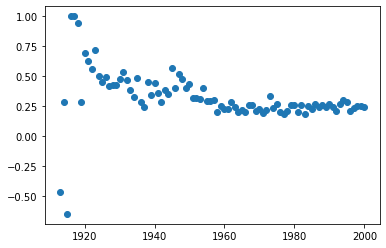

In [40]:
#the second part can be understood by drawing a sactter plot. and bar graph.
#correlation increase of each year.
import matplotlib.pyplot
import pylab
matplotlib.pyplot.scatter(yearly_corr['year'],yearly_corr['correlation'])

<BarContainer object of 89 artists>

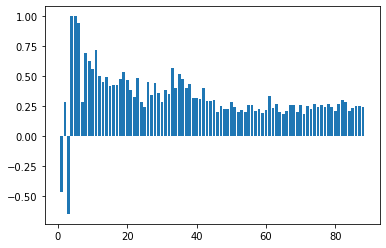

In [42]:
plt.bar(np.arange(len(yearly_corr['year'])), yearly_corr['correlation'])

#Data Visulaization
##2. Draw a scatterplot of rank vs votes for every movie with at least 10,000 votes. (x-axis=votes, y-axis=rank)

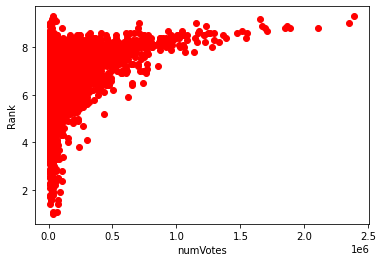

In [43]:
movies_10000 = movies[movies["numVotes"] >= 10000]
plt.scatter(movies_10000["numVotes"],movies_10000["averageRating"],color = "r")
plt.xlabel("numVotes")
plt.ylabel("Rank")
plt.show()

Templates
# 1. Using Tornado templates, Draw bar graph of the number of movies by year since 1900


In [44]:
#forst selecting movies after 1900
movies_since1900 = movies[movies['startYear'] >= 1900]
movies_since1900

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
340,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,8
374,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.1,632
383,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,6.0,5
398,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,14
406,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.8,12
...,...,...,...,...,...,...,...,...,...,...,...
1151081,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.5,139
1151087,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.7,1047
1151090,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Adventure,Drama,History",6.3,3211
1151093,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.8,12


In [45]:
#now taking the count of movies for each year using groupby
count_movies = movies_since1900.groupby(['startYear']).count()
count_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
startYear,,,,,,,,,,
1900,2,2,2,2,2,2,2,2,2,2
1901,1,1,1,1,1,1,1,1,1,1
1902,1,1,1,1,1,1,1,1,1,1
1903,1,1,1,1,1,1,1,1,1,1
1904,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2017,9704,9704,9704,9704,9704,9704,9704,9704,9704,9704
2018,9558,9558,9558,9558,9558,9558,9558,9558,9558,9558
2019,9228,9228,9228,9228,9228,9228,9228,9228,9228,9228


In [46]:
count_movies.reset_index(level=0, inplace=True)
count_movies

,startYear,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,1900,2,2,2,2,2,2,2,2,2,2
1,1901,1,1,1,1,1,1,1,1,1,1
2,1902,1,1,1,1,1,1,1,1,1,1
3,1903,1,1,1,1,1,1,1,1,1,1
4,1904,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
117,2017,9704,9704,9704,9704,9704,9704,9704,9704,9704,9704
118,2018,9558,9558,9558,9558,9558,9558,9558,9558,9558,9558
119,2019,9228,9228,9228,9228,9228,9228,9228,9228,9228,9228
120,2020,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338


In [47]:
# A Tornado template is just HTML (or any other text-based format) with 
# Python control sequences and expressions embedded within the markup:
def bar_graph(x, y, img, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(img, transparent=True, bbox_inches='tight')
    plt.show()
    img.seek(0)

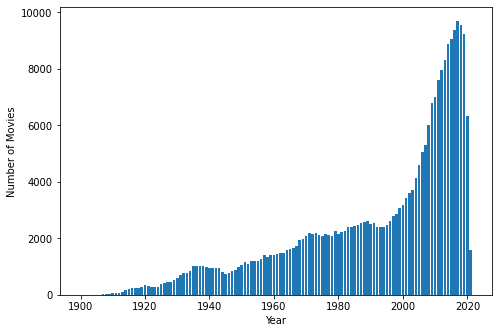

In [52]:
import io
import base64
#now embeeding the above python control in html markup.
img = io.BytesIO()
# Data can be kept as bytes in an in-memory buffer when we use the
# io module's Byte IO operations.
#passing the movies count and year to the bargraph function.
bar_graph(count_movies['startYear'], count_movies['titleType'], img, "Year", "Number of Movies")

#the function returns the barplot as result.
#we encode that using the b64encode and read the image.
res = base64.b64encode(img.read()).decode("UTF-8")
#HEre we embedd the image in html markup format.
with open("imdb_graph_tornado.html", "w") as file:
    file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(res))

#3. Convert these files into PDF without using a browser.

In [55]:
pip install pdfcrowd

In [56]:
import pdfcrowd
client = pdfcrowd.HtmlToPdfClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')

#for ocnverting here we use an online api service called pdfcrowd.
#calling the htmltppdfclinet to call api service.

client.convertFileToFile('imdb_graph_tornado.html', 'imdb_graph_tornado.pdf')